<a href="https://colab.research.google.com/github/KimJisanER/Tensorflow/blob/main/_8_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)


## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [3]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

## IMDB 데이터 적용

### 데이터 로드

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [7]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [8]:
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [10]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 78s 469ms/step - loss: 0.6321 - acc: 0.6295 - val_loss: 0.5563 - val_acc: 0.7158
Epoch 2/10
157/157 [==============================] - 75s 476ms/step - loss: 0.3967 - acc: 0.8315 - val_loss: 0.4766 - val_acc: 0.7666
Epoch 3/10
157/157 [==============================] - 90s 575ms/step - loss: 0.2881 - acc: 0.8831 - val_loss: 0.4111 - val_acc: 0.8188
Epoch 4/10
157/157 [==============================] - 92s 585ms/step - loss: 0.2160 - acc: 0.9184 - val_loss: 0.3909 - val_acc: 0.8370
Epoch 5/10
157/157 [==============================] - 73s 462ms/step - loss: 0.1552 - acc: 0.9441 - val_loss: 0.4016 - val_acc: 0.8470
Epoch 6/10
157/157 [==============================] - 82s 525ms/step - loss: 0.1038 - acc: 0.9646 - val_loss: 0.4486 - val_acc: 0.8268
Epoch 7/10
157/157 [==============================] - 91s 583ms/step - loss: 0.0666 - acc: 0.9785 - val_loss: 0.4600 - val_acc: 0.8538
Epoch 8/10
157/157 [==============================] - 8

### 시각화

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

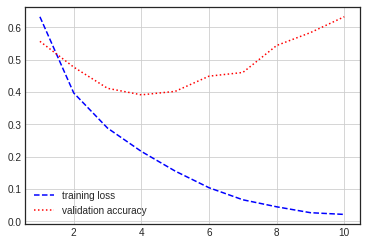

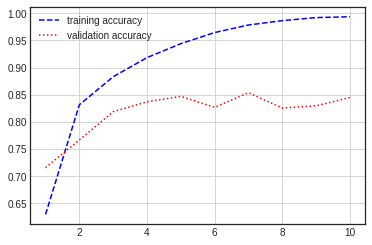

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [13]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 33s 42ms/step - loss: 0.6709 - acc: 0.8391


[0.6708990335464478, 0.8390799760818481]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [14]:
from tensorflow.keras.datasets import reuters

In [15]:
num_words = 10000
(x_train, y_train), (x_test, y_test) =reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
max_len = 500

In [18]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

500


In [19]:
print(pad_x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [21]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [22]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 15s 45ms/step - loss: 2.5010 - acc: 0.3787 - val_loss: 2.0892 - val_acc: 0.4942
Epoch 2/20
225/225 [==============================] - 9s 42ms/step - loss: 1.9719 - acc: 0.4971 - val_loss: 2.0145 - val_acc: 0.5025
Epoch 3/20
225/225 [==============================] - 10s 43ms/step - loss: 1.7940 - acc: 0.5255 - val_loss: 1.7911 - val_acc: 0.5403
Epoch 4/20
225/225 [==============================] - 9s 42ms/step - loss: 1.7651 - acc: 0.5324 - val_loss: 1.8000 - val_acc: 0.5264
Epoch 5/20
225/225 [==============================] - 9s 42ms/step - loss: 1.7180 - acc: 0.5399 - val_loss: 1.7269 - val_acc: 0.5442
Epoch 6/20
225/225 [==============================] - 9s 42ms/step - loss: 1.6039 - acc: 0.5819 - val_loss: 1.7077 - val_acc: 0.5643
Epoch 7/20
225/225 [==============================] - 10s 44ms/step - loss: 1.5411 - acc: 0.6007 - val_loss: 1.6657 - val_acc: 0.5743
Epoch 8/20
225/225 [==============================] - 9s 42ms/step

### 시각화

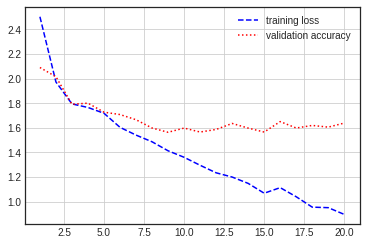

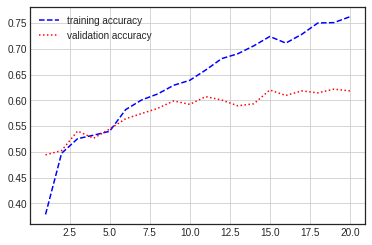

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [24]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 2s 21ms/step - loss: 1.7030 - acc: 0.6158


[1.703048825263977, 0.6157613396644592]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [26]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [28]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [29]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 35ms/step - loss: 0.5120 - acc: 0.7536 - val_loss: 0.4165 - val_acc: 0.8250
Epoch 2/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2946 - acc: 0.8829 - val_loss: 0.2851 - val_acc: 0.8870
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2315 - acc: 0.9142 - val_loss: 0.2804 - val_acc: 0.8890
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1971 - acc: 0.9258 - val_loss: 0.6512 - val_acc: 0.7942
Epoch 5/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1757 - acc: 0.9376 - val_loss: 0.4614 - val_acc: 0.8338
Epoch 6/10
157/157 [==============================] - 5s 29ms/step - loss: 0.1573 - acc: 0.9445 - val_loss: 0.3170 - val_acc: 0.8860
Epoch 7/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1396 - acc: 0.9508 - val_loss: 0.4690 - val_acc: 0.8630
Epoch 8/10
157/157 [==============================] - 4s 27ms/step - 

### 시각화

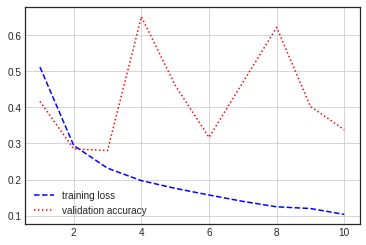

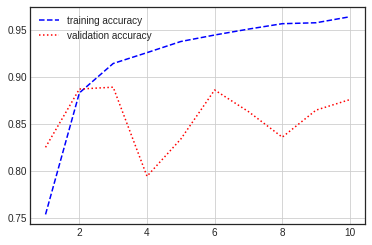

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [31]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.3846 - acc: 0.8657


[0.38457292318344116, 0.8657199740409851]

# Cosine 함수를 이용한 순환 신경망

In [59]:
import numpy as np

In [60]:
np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time%30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2*np.pi*month_time),
                            np.cos(2*np.pi*month_time) + np.random.random(361))

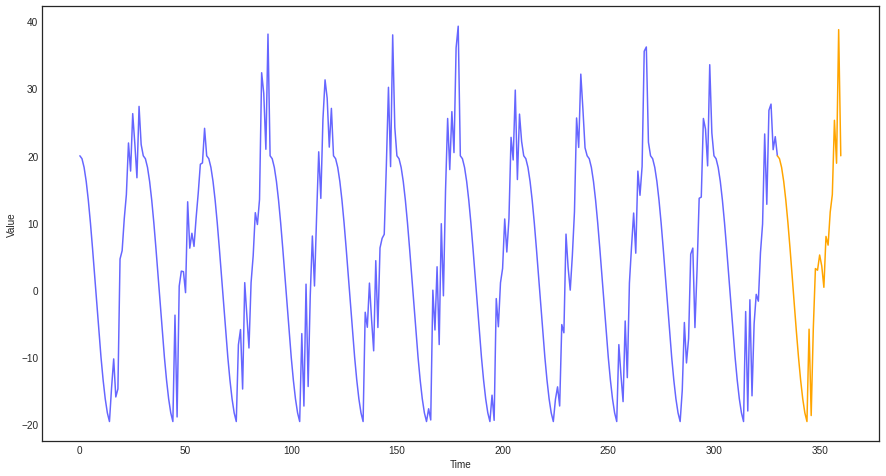

In [61]:
plt.figure(figsize=(15,8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color='blue', alpha=0.6, label='Train Data')
plt.plot(np.arange(30*11, 30*12 +1),
         time_series[30*11:],
         color='orange',label='Test Data')
plt.show()

### 데이터 전처리

In [62]:
def make_data(time_series, n):
  x_train_full, y_train_full = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n) < len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else:
      break
  
  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

  return x_train_full, y_train_full

In [63]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [64]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [65]:
x_train_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1, 1)

In [66]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [67]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [68]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [69]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [70]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [71]:
def build_model(n):
  model = Sequential()

  model.add(SimpleRNN(units=32, activation='tanh', input_shape=(n,1)))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mse')

  return model

In [72]:
model = build_model(10)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [73]:
model.fit(x_train, y_train,
          epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 220.6455
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 178.1934
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 153.3687
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 137.6438
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 124.9840
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 112.9028
Epoch 7/100
28/28 [==============================] - 0s 10ms/step - loss: 99.7557
Epoch 8/100
28/28 [==============================] - 0s 11ms/step - loss: 90.6304
Epoch 9/100
28/28 [==============================] - 0s 10ms/step - loss: 84.1638
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 78.8387
Epoch 11/100
28/28 [==============================] - 0s 9ms/step - loss: 74.0768
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 70.1497
Epoch 13/100
2

## 예측값 그려보기

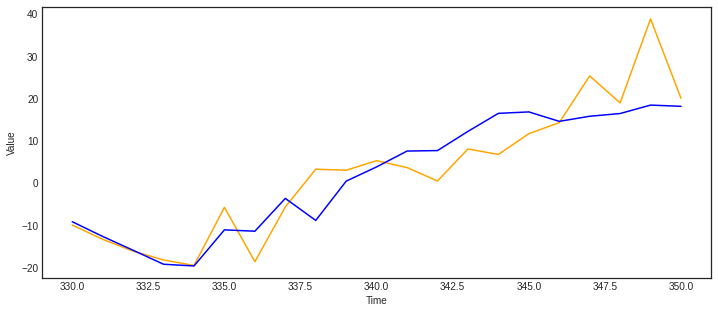

In [84]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='blue', label='Ground Truth')

## 모델 재구성 (2)
- LSTM 사용

In [75]:
from tensorflow.keras.layers import LSTM

In [76]:
def build_model2(n):
  model = Sequential()

  model.add(LSTM(units=64, return_sequences=True, input_shape=(n, 1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse')
  
  return model

In [77]:
model_2 = build_model2(10)
model_2.summary()
model_2 = build_model2(10)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [78]:
model_2.fit(x_train, y_train,
            epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 214.3100
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 151.8663
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 109.1654
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 82.9984
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 69.0195
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 58.1899
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 51.0170
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 45.8280
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 42.1900
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 39.0984
Epoch 11/100
28/28 [==============================] - 0s 6ms/step - loss: 36.9964
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 35.5166
Epoch 13/100
28/28 [==

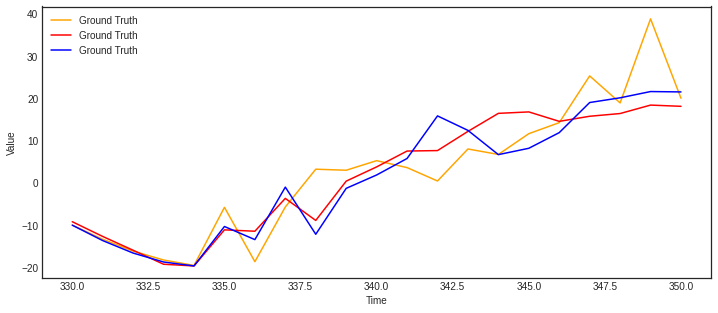

In [85]:
prediction_2 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='red', label='Ground Truth')
plt.plot(pred_range, prediction_2.flatten(), color='blue', label='Ground Truth')
plt.legend()
plt.show()


## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [80]:
from tensorflow.keras.layers import GRU

In [81]:
def build_model3(n):
  model = Sequential()

  model.add(LSTM(units=64, return_sequences=True, input_shape=(n, 1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse')
  
  return model

model_3 = build_model3(10)
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10, 64)            16896     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [82]:
model_3.fit(x_train, y_train,
            epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 218.5365
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 163.4183
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 123.4554
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 100.7814
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 83.3799
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 71.2359
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 60.7780
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 52.7808
Epoch 9/100
28/28 [==============================] - 0s 6ms/step - loss: 48.3070
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 45.0808
Epoch 11/100
28/28 [==============================] - 0s 5ms/step - loss: 41.5438
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 38.7363
Epoch 13/100
28/28 [=

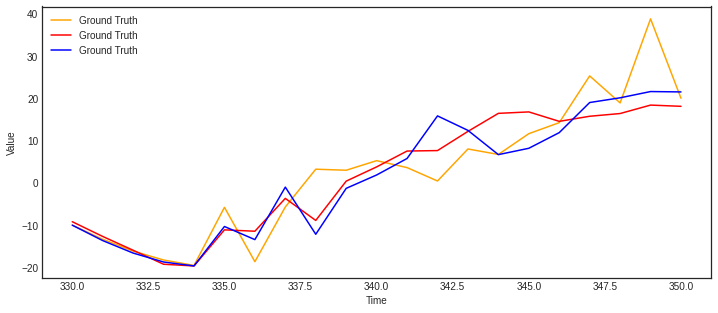

In [87]:
prediction_3 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction))

plt.figure(figsize=(12,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='red', label='Ground Truth')
plt.plot(pred_range, prediction_2.flatten(), color='blue', label='Ground Truth')
plt.legend()
plt.show()


# Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [47]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [48]:
num_words = 10000
max_len = 500
batch_size =32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

25000
25000


In [50]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test= pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [54]:
def build_model():
  model = Sequential()

  model.add(Embedding(input_dim=num_words, output_dim=32,
                      input_length=max_len))
  model.add(Conv1D(32, 7, activation='relu'))
  model.add(MaxPooling1D(7))
  model.add(Conv1D(32, 5, activation='relu'))
  model.add(MaxPooling1D(5))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

In [55]:
model=build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 494, 32)           7200      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 70, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)              

### 모델 학습

In [56]:
history = model.fit(pad_x_train, y_train,
                    batch_size=128, epochs=30,
                    validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 9s 9ms/step - loss: 0.6926 - accuracy: 0.5157 - val_loss: 0.6925 - val_accuracy: 0.4948
Epoch 2/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6903 - accuracy: 0.6053 - val_loss: 0.6905 - val_accuracy: 0.6150
Epoch 3/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6866 - accuracy: 0.6912 - val_loss: 0.6857 - val_accuracy: 0.6178
Epoch 4/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6776 - accuracy: 0.7455 - val_loss: 0.6712 - val_accuracy: 0.7438
Epoch 5/30
157/157 [==============================] - 1s 8ms/step - loss: 0.6529 - accuracy: 0.7648 - val_loss: 0.6355 - val_accuracy: 0.7534
Epoch 6/30
157/157 [==============================] - 1s 8ms/step - loss: 0.5992 - accuracy: 0.7937 - val_loss: 0.5666 - val_accuracy: 0.8026
Epoch 7/30
157/157 [==============================] - 1s 8ms/step - loss: 0.5180 - accuracy: 0.8216 - val_loss: 0.4842 - val_accuracy: 0.8198
Epoch 

### 시각화

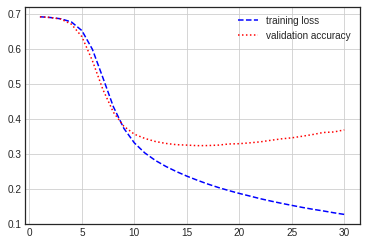

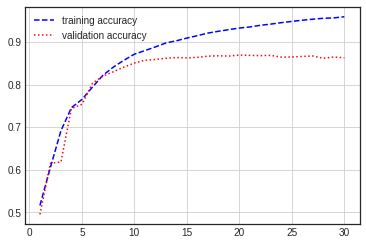

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음